Data Exploration and Preprocessing

   CustomerID  Age  AnnualIncome  SpendingScore
0           1   22         15000             39
1           2   35         40000             81
2           3   26         30000             77
3           4   40         50000             40
4           5   55        100000              6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   CustomerID     20 non-null     int64
 1   Age            20 non-null     int64
 2   AnnualIncome   20 non-null     int64
 3   SpendingScore  20 non-null     int64
dtypes: int64(4)
memory usage: 768.0 bytes
None
       CustomerID        Age  AnnualIncome  SpendingScore
count    20.00000  20.000000      20.00000      20.000000
mean     10.50000  35.800000   45600.00000      58.500000
std       5.91608   8.538458   19129.47574      22.361857
min       1.00000  22.000000   15000.00000       6.000000
25%       5.75000  2

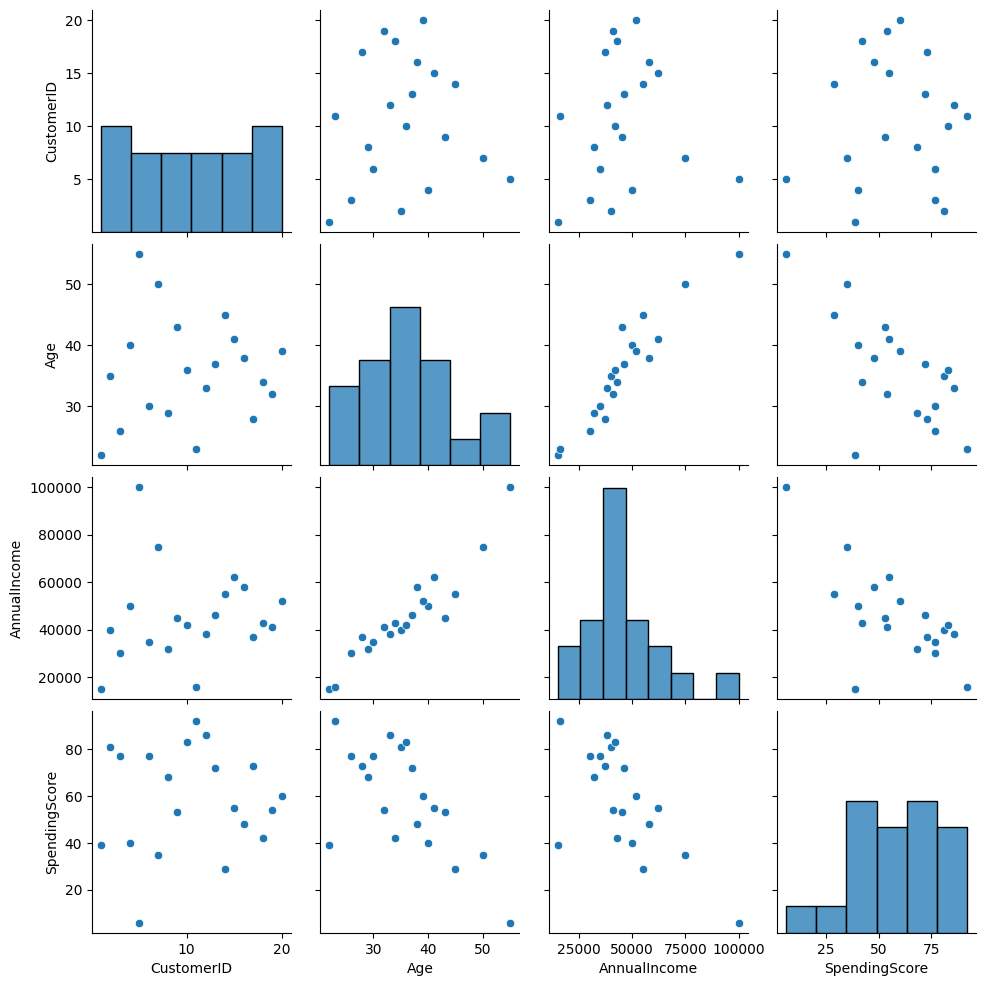

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


df = pd.read_csv('/content/customer_segmentation.csv')

print(df.head())
print(df.info())
print(df.describe())

df.fillna(df.mean(), inplace=True)


scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


sns.pairplot(df)
plt.show()

Model Development

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

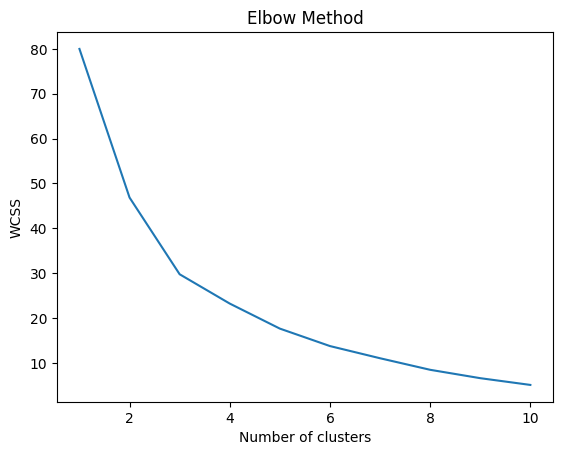

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

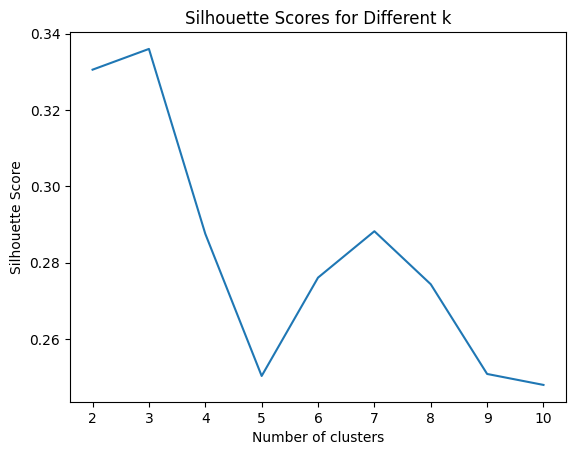

In [2]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clusters = kmeans.fit_predict(scaled_data)
    score = silhouette_score(scaled_data, clusters)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

Model Evaluation

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Inertia: 29.75655774740478
Silhouette Score: 0.3360166117266691


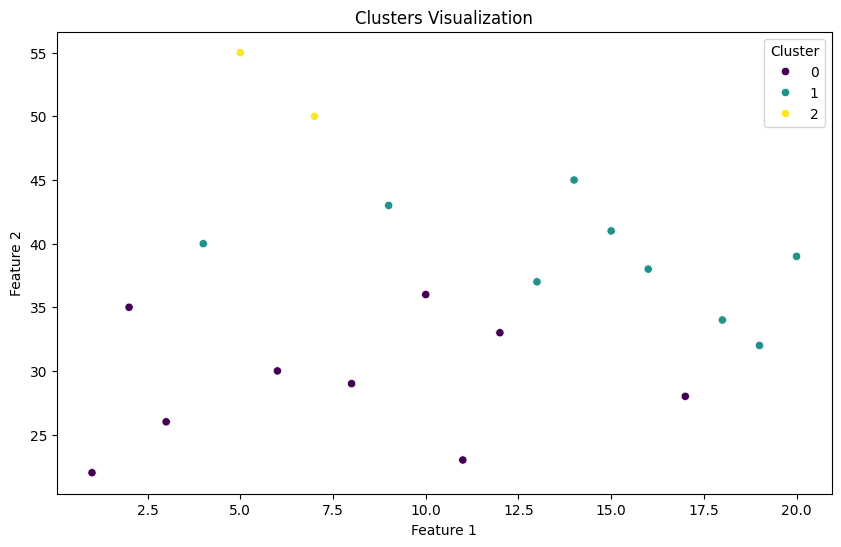

Cluster Centers (original scale):
[[7.77777778e+00 2.91111111e+01 3.16666667e+04 7.51111111e+01]
 [1.42222222e+01 3.87777778e+01 5.02222222e+04 5.03333333e+01]
 [6.00000000e+00 5.25000000e+01 8.75000000e+04 2.05000000e+01]]

Cluster 0 Summary:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    9.000000   9.000000      9.000000       9.000000      9.0
mean     7.777778  29.111111  31666.666667      75.111111      0.0
std      5.286251   4.960959   9886.859967      15.276162      0.0
min      1.000000  22.000000  15000.000000      39.000000      0.0
25%      3.000000  26.000000  30000.000000      73.000000      0.0
50%      8.000000  29.000000  35000.000000      77.000000      0.0
75%     11.000000  33.000000  38000.000000      83.000000      0.0
max     17.000000  36.000000  42000.000000      92.000000      0.0

Cluster 1 Summary:
       CustomerID        Age  AnnualIncome  SpendingScore  Cluster
count    9.000000   9.000000      9.000000       9.000000      9.0

In [3]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
clusters = kmeans.fit_predict(scaled_data)

inertia = kmeans.inertia_
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Inertia: {inertia}')
print(f'Silhouette Score: {silhouette_avg}')

df['Cluster'] = clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters Visualization')
plt.show()


cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print("Cluster Centers (original scale):")
print(cluster_centers)

for i in range(optimal_k):
    cluster_summary = df[df['Cluster'] == i].describe()
    print(f"\nCluster {i} Summary:")
    print(cluster_summary)